# Comparisons In A Given Loss Landscape

In [1]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from minima_volume.analysis_funcs import (  grab_folder_names,
                                            load_base_train_size,
                                            list_additional_data,
                                            load_param_num,
                                            multiple_minima_fixed_landscape,
                                            fixed_landscape_minima_labels,
                                            plot_fixed_landscape_minima_pair,
                                            model_volume_across_targets,
                                            append_cutoff_points,
                                            varying_landscape_minima_labels,
                                            plot_minima_volume_vs_data_level,    
                                            save_results_dict_npz,
)

problem_name = "SVHN"

loss_value = 0.1  # Loss value to analyze
data_level_log = False #Is the data log distributed?
base_output_dir = "analysis"  # Root folder to save all plots
os.makedirs(base_output_dir, exist_ok=True)

# Data for the loss landscape levels
experiment_folders, data_modifications = grab_folder_names()

base_train_size = load_base_train_size(experiment_folders[0])
model_data_sizes = list_additional_data(experiment_folders[0])
num_params = load_param_num(experiment_folders[0], data_modifications[0], loss_value = loss_value)

base_shift = 0
if data_modifications[0].startswith("data_"):
    base_shift = base_train_size  # Shift to reflect true dataset size

print("Experiment folders: ", experiment_folders)
print("Different data levels where loss landscapes were computed:", data_modifications)
print("The base train size is: ", base_train_size)
print("Data levels where models were trained: ", model_data_sizes)
print("The number of model parameters is ", num_params)

First entry: Model_0, base_train_size = 60
Experiment folders:  ['model_0_data_10', 'model_1_data_11', 'model_2_data_12', 'model_3_data_13', 'model_4_data_14']
Different data levels where loss landscapes were computed: ['data_0', 'data_1940', 'data_540', 'data_5940']
The base train size is:  60
Data levels where models were trained:  [0, 2940, 29940, 540, 5940, 59940]
The number of model parameters is  1707274


## Plotting Different Model Volumes In A Landscape

In [2]:
# Needed for fixed colors for background plots
import matplotlib as mpl

#cmap = mpl.colormaps.get_cmap("winter")  # blue → green
#background_colors = [cmap(i) for i in np.linspace(0, 1, 10)]

#natural_label = "Minima (On Base Dataset)"
if data_modifications[0].startswith("data_"):
    other_label = "Minima (Larger Datasets)"
else:
    other_label = "Minima (Poisoned Datasets)"


Processing data modification folder: data_0
Saved data to analysis\data_0\minima_data.npz
⚠️ Inf detected in y_vals: [7686350.49310294 6954970.0529474  6232652.68672477 6027349.76672897
             -inf             -inf]
⚠️ Inf detected in y_vals: [7551362.96472166 6955218.6054334  6235023.45293251 6028388.9675335
             -inf             -inf]
⚠️ Inf detected in y_vals: [7813059.49302732 6615413.05014365 6233204.55905067 6027084.40533004
             -inf             -inf]
⚠️ Inf detected in y_vals: [7685900.59856035 7113653.41246285 6235096.45529952 5807720.8958522
             -inf             -inf]
⚠️ Inf detected in y_vals: [7552068.36800819 6788395.07431352 6233294.23342331 6028195.80917239
             -inf             -inf]


L:\Programming\ARC\minima_volume_project\minima_volume\analysis_funcs.py:654: RuntimeWarning: Mean of empty slice
  center_y = np.nanmean(y_array, axis=0)


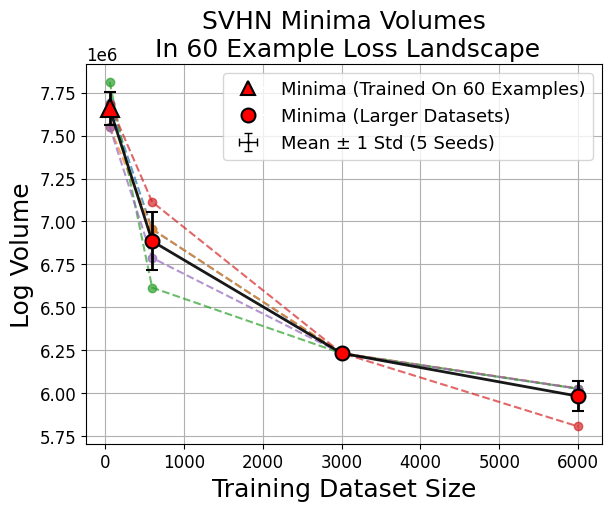

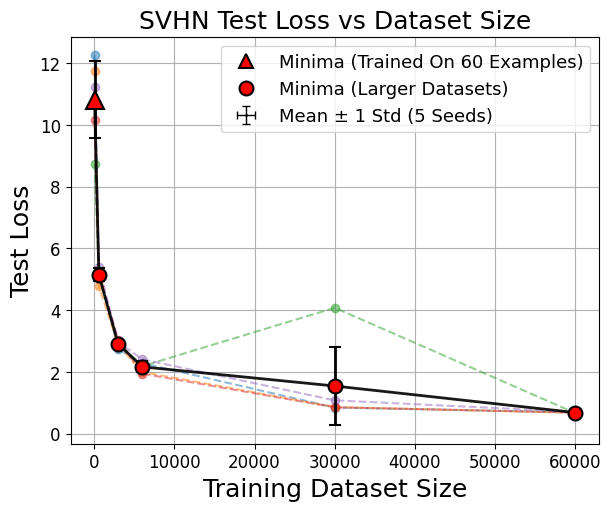

⚠️ Inf detected in x_vals: [7686350.49310294 6954970.0529474  6232652.68672477 6027349.76672897
             -inf             -inf]
⚠️ Inf detected in x_vals: [7551362.96472166 6955218.6054334  6235023.45293251 6028388.9675335
             -inf             -inf]
⚠️ Inf detected in x_vals: [7813059.49302732 6615413.05014365 6233204.55905067 6027084.40533004
             -inf             -inf]
⚠️ Inf detected in x_vals: [7685900.59856035 7113653.41246285 6235096.45529952 5807720.8958522
             -inf             -inf]
⚠️ Inf detected in x_vals: [7552068.36800819 6788395.07431352 6233294.23342331 6028195.80917239
             -inf             -inf]


L:\Programming\diffusion-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


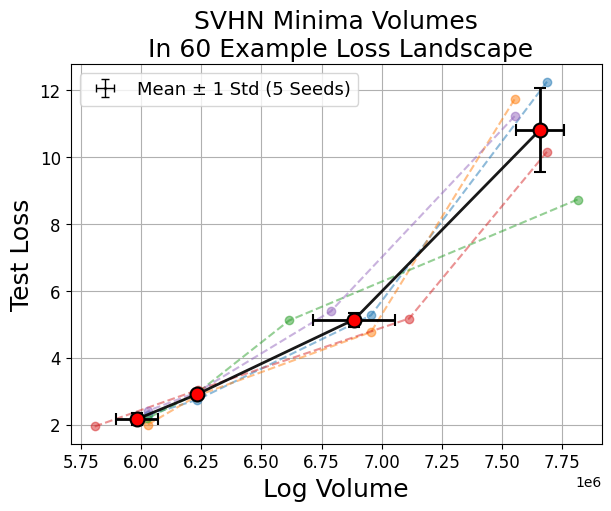

⚠️ Inf detected in y_vals: [7686350.49310294 6954970.0529474  6232652.68672477 6027349.76672897
             -inf             -inf]
⚠️ Inf detected in y_vals: [7551362.96472166 6955218.6054334  6235023.45293251 6028388.9675335
             -inf             -inf]
⚠️ Inf detected in y_vals: [7813059.49302732 6615413.05014365 6233204.55905067 6027084.40533004
             -inf             -inf]
⚠️ Inf detected in y_vals: [7685900.59856035 7113653.41246285 6235096.45529952 5807720.8958522
             -inf             -inf]
⚠️ Inf detected in y_vals: [7552068.36800819 6788395.07431352 6233294.23342331 6028195.80917239
             -inf             -inf]


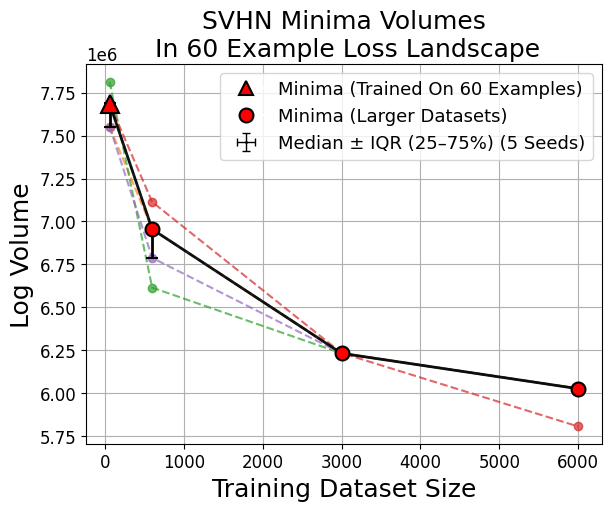

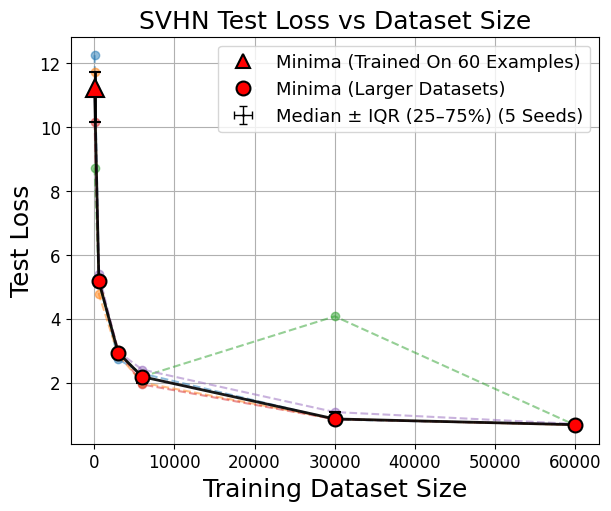

⚠️ Inf detected in x_vals: [7686350.49310294 6954970.0529474  6232652.68672477 6027349.76672897
             -inf             -inf]
⚠️ Inf detected in x_vals: [7551362.96472166 6955218.6054334  6235023.45293251 6028388.9675335
             -inf             -inf]
⚠️ Inf detected in x_vals: [7813059.49302732 6615413.05014365 6233204.55905067 6027084.40533004
             -inf             -inf]
⚠️ Inf detected in x_vals: [7685900.59856035 7113653.41246285 6235096.45529952 5807720.8958522
             -inf             -inf]
⚠️ Inf detected in x_vals: [7552068.36800819 6788395.07431352 6233294.23342331 6028195.80917239
             -inf             -inf]


L:\Programming\diffusion-env\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


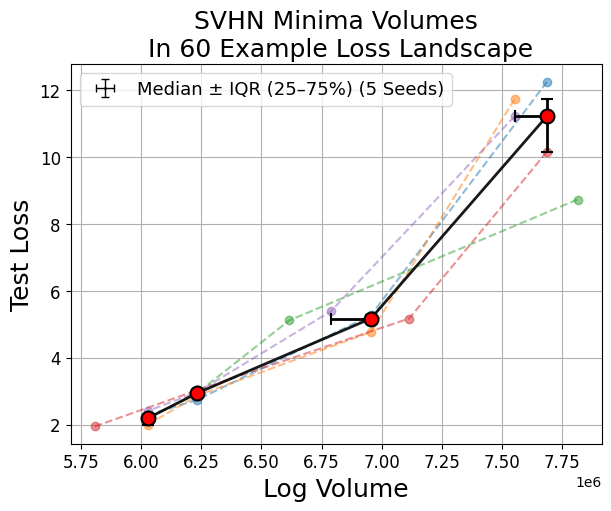


Processing data modification folder: data_1940
Saved data to analysis\data_1940\minima_data.npz
⚠️ Inf detected in y_vals: [5808426.84937861 5319739.21558455             -inf             -inf]
⚠️ Inf detected in y_vals: [5805820.70209237 5571950.78293227             -inf             -inf]
⚠️ Inf detected in y_vals: [5572309.0949763  5319802.14992703             -inf             -inf]
⚠️ Inf detected in y_vals: [5807400.0128104  5319227.52904419             -inf             -inf]
⚠️ Inf detected in y_vals: [5807829.75602928 5319739.21558455             -inf             -inf]


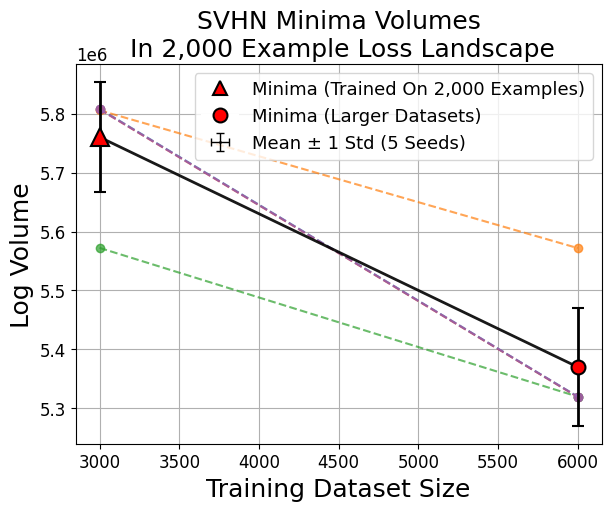

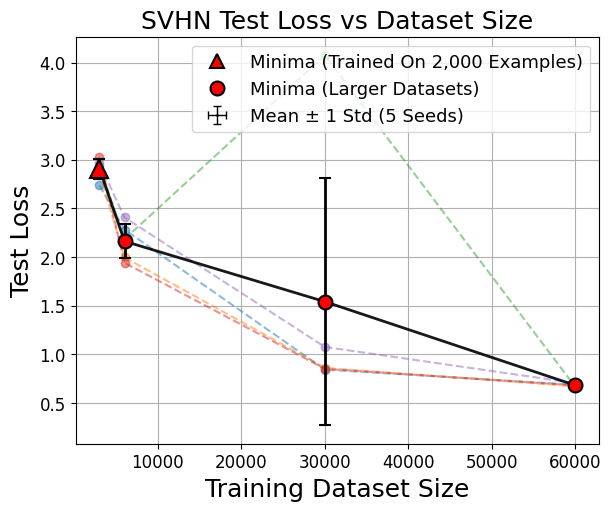

⚠️ Inf detected in x_vals: [5808426.84937861 5319739.21558455             -inf             -inf]
⚠️ Inf detected in x_vals: [5805820.70209237 5571950.78293227             -inf             -inf]
⚠️ Inf detected in x_vals: [5572309.0949763  5319802.14992703             -inf             -inf]
⚠️ Inf detected in x_vals: [5807400.0128104  5319227.52904419             -inf             -inf]
⚠️ Inf detected in x_vals: [5807829.75602928 5319739.21558455             -inf             -inf]


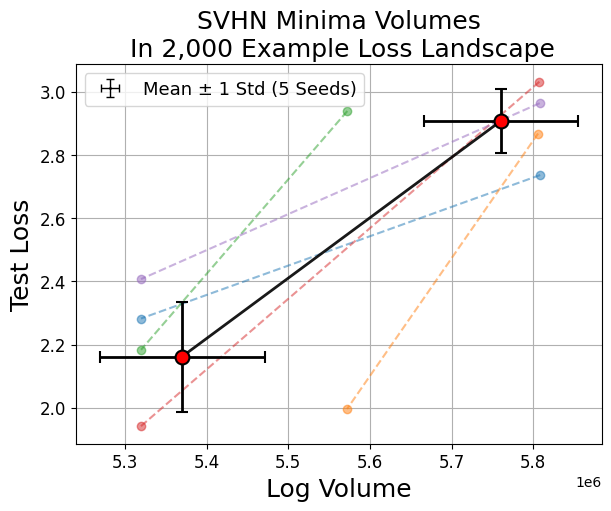

⚠️ Inf detected in y_vals: [5808426.84937861 5319739.21558455             -inf             -inf]
⚠️ Inf detected in y_vals: [5805820.70209237 5571950.78293227             -inf             -inf]
⚠️ Inf detected in y_vals: [5572309.0949763  5319802.14992703             -inf             -inf]
⚠️ Inf detected in y_vals: [5807400.0128104  5319227.52904419             -inf             -inf]
⚠️ Inf detected in y_vals: [5807829.75602928 5319739.21558455             -inf             -inf]


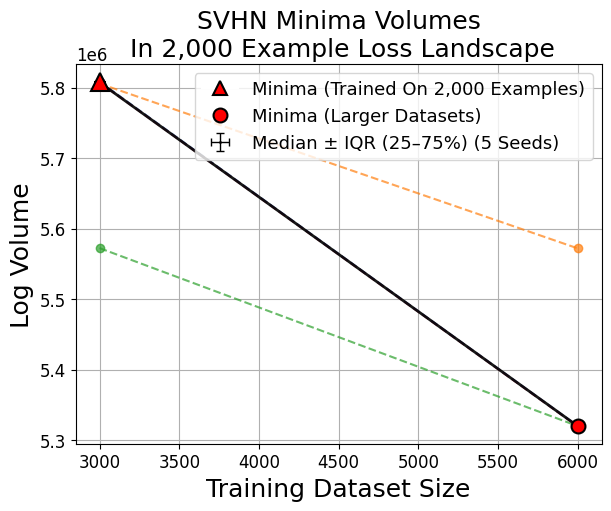

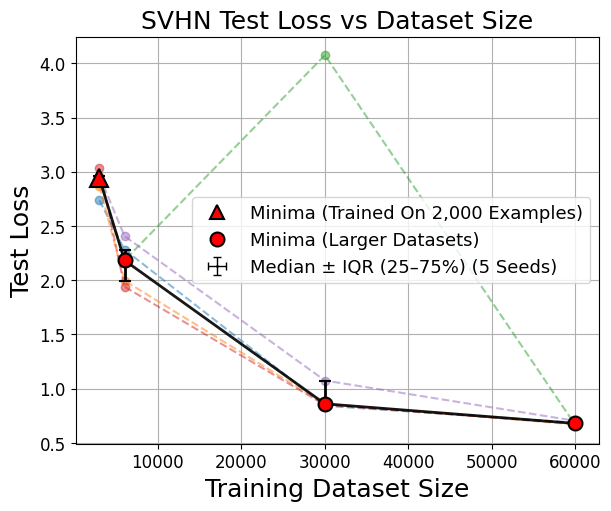

⚠️ Inf detected in x_vals: [5808426.84937861 5319739.21558455             -inf             -inf]
⚠️ Inf detected in x_vals: [5805820.70209237 5571950.78293227             -inf             -inf]
⚠️ Inf detected in x_vals: [5572309.0949763  5319802.14992703             -inf             -inf]
⚠️ Inf detected in x_vals: [5807400.0128104  5319227.52904419             -inf             -inf]
⚠️ Inf detected in x_vals: [5807829.75602928 5319739.21558455             -inf             -inf]


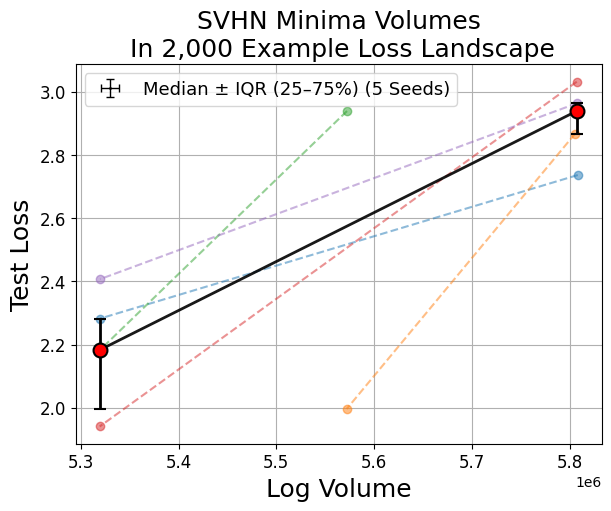


Processing data modification folder: data_540
Saved data to analysis\data_540\minima_data.npz
⚠️ Inf detected in y_vals: [6431546.66549096 5808426.84937861 5319739.21558455             -inf
             -inf]
⚠️ Inf detected in y_vals: [6613379.12837705 5807548.90494051 5571950.78293227             -inf
             -inf]
⚠️ Inf detected in y_vals: [6430286.686033   5807888.56632633 5319802.14992703             -inf
             -inf]
⚠️ Inf detected in y_vals: [6614683.11321506 5808052.71443136 5319957.4842603              -inf
             -inf]
⚠️ Inf detected in y_vals: [6429525.5955634  5806330.28592915 5319318.05343113             -inf
             -inf]


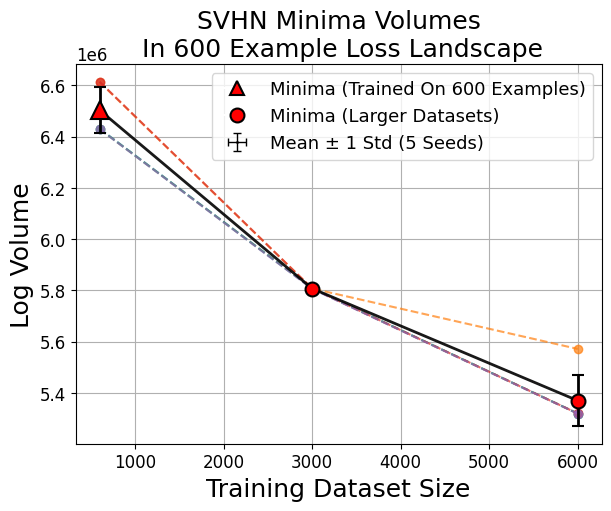

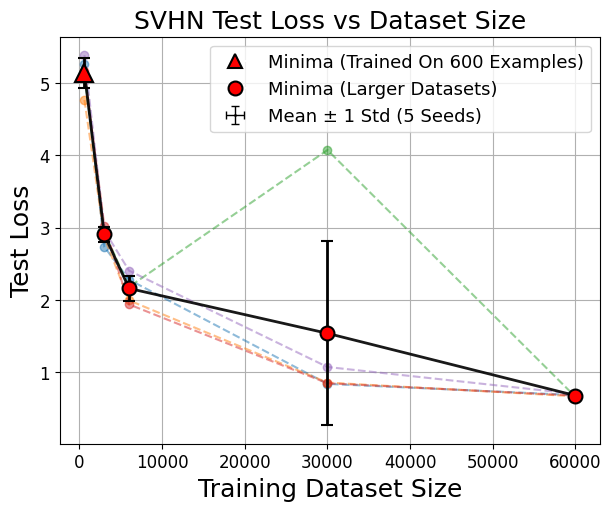

⚠️ Inf detected in x_vals: [6431546.66549096 5808426.84937861 5319739.21558455             -inf
             -inf]
⚠️ Inf detected in x_vals: [6613379.12837705 5807548.90494051 5571950.78293227             -inf
             -inf]
⚠️ Inf detected in x_vals: [6430286.686033   5807888.56632633 5319802.14992703             -inf
             -inf]
⚠️ Inf detected in x_vals: [6614683.11321506 5808052.71443136 5319957.4842603              -inf
             -inf]
⚠️ Inf detected in x_vals: [6429525.5955634  5806330.28592915 5319318.05343113             -inf
             -inf]


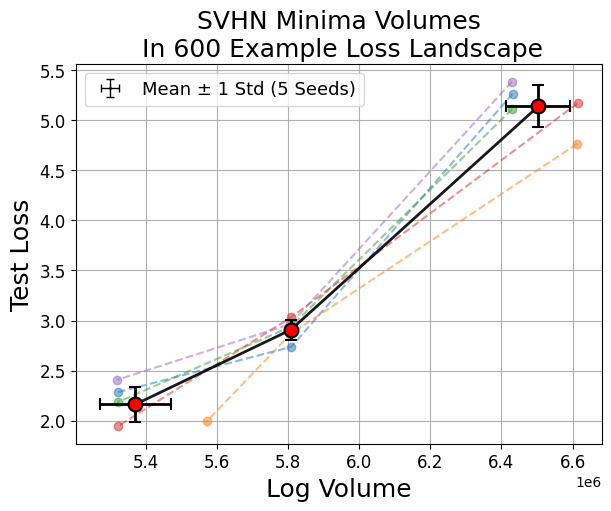

⚠️ Inf detected in y_vals: [6431546.66549096 5808426.84937861 5319739.21558455             -inf
             -inf]
⚠️ Inf detected in y_vals: [6613379.12837705 5807548.90494051 5571950.78293227             -inf
             -inf]
⚠️ Inf detected in y_vals: [6430286.686033   5807888.56632633 5319802.14992703             -inf
             -inf]
⚠️ Inf detected in y_vals: [6614683.11321506 5808052.71443136 5319957.4842603              -inf
             -inf]
⚠️ Inf detected in y_vals: [6429525.5955634  5806330.28592915 5319318.05343113             -inf
             -inf]


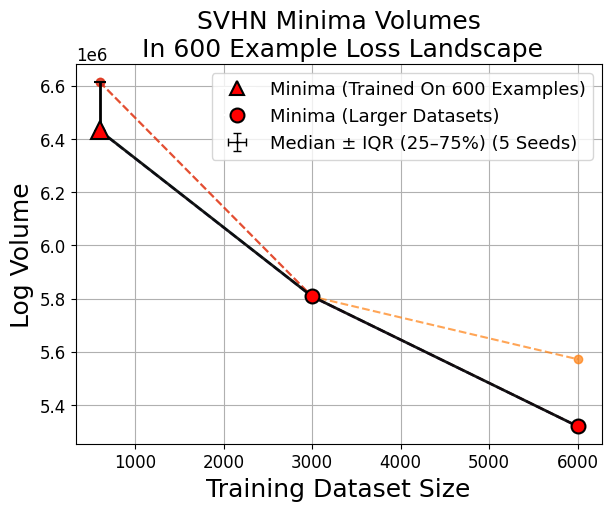

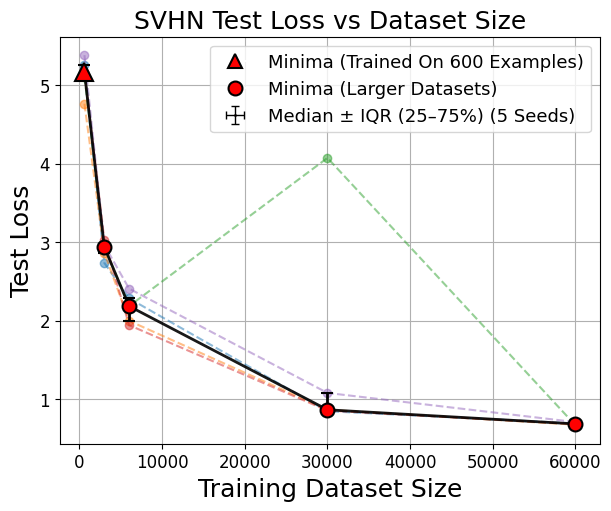

⚠️ Inf detected in x_vals: [6431546.66549096 5808426.84937861 5319739.21558455             -inf
             -inf]
⚠️ Inf detected in x_vals: [6613379.12837705 5807548.90494051 5571950.78293227             -inf
             -inf]
⚠️ Inf detected in x_vals: [6430286.686033   5807888.56632633 5319802.14992703             -inf
             -inf]
⚠️ Inf detected in x_vals: [6614683.11321506 5808052.71443136 5319957.4842603              -inf
             -inf]
⚠️ Inf detected in x_vals: [6429525.5955634  5806330.28592915 5319318.05343113             -inf
             -inf]


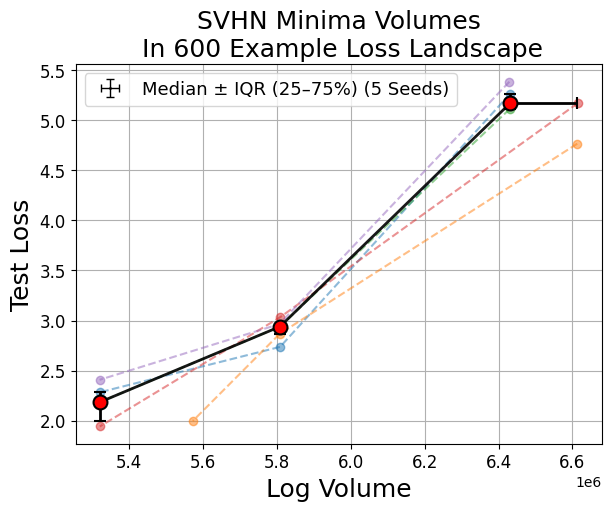


Processing data modification folder: data_5940
Saved data to analysis\data_5940\minima_data.npz
⚠️ Inf detected in y_vals: [5319739.21558455             -inf             -inf]
⚠️ Inf detected in y_vals: [5320376.2589317            -inf            -inf]
⚠️ Inf detected in y_vals: [5319802.14992703             -inf             -inf]
⚠️ Inf detected in y_vals: [5317736.37361524             -inf             -inf]
⚠️ Inf detected in y_vals: [5319258.12937398             -inf             -inf]


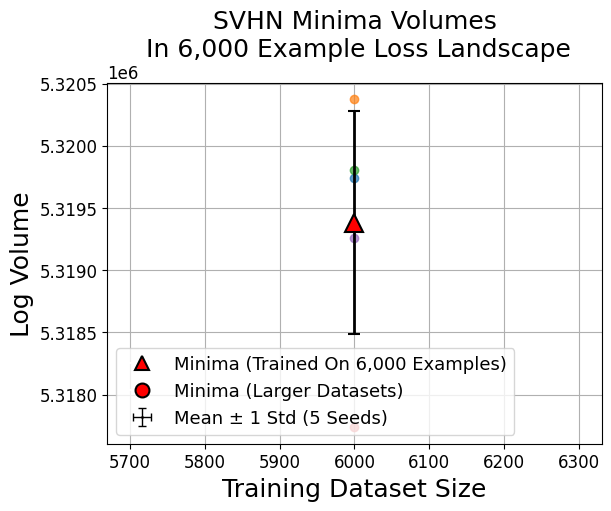

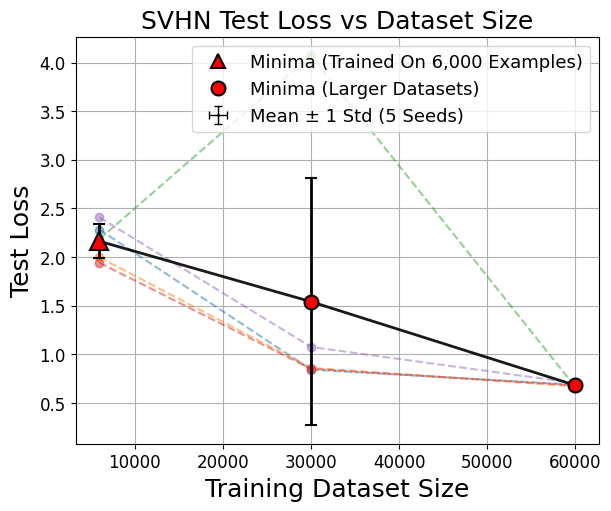

⚠️ Inf detected in x_vals: [5319739.21558455             -inf             -inf]
⚠️ Inf detected in x_vals: [5320376.2589317            -inf            -inf]
⚠️ Inf detected in x_vals: [5319802.14992703             -inf             -inf]
⚠️ Inf detected in x_vals: [5317736.37361524             -inf             -inf]
⚠️ Inf detected in x_vals: [5319258.12937398             -inf             -inf]


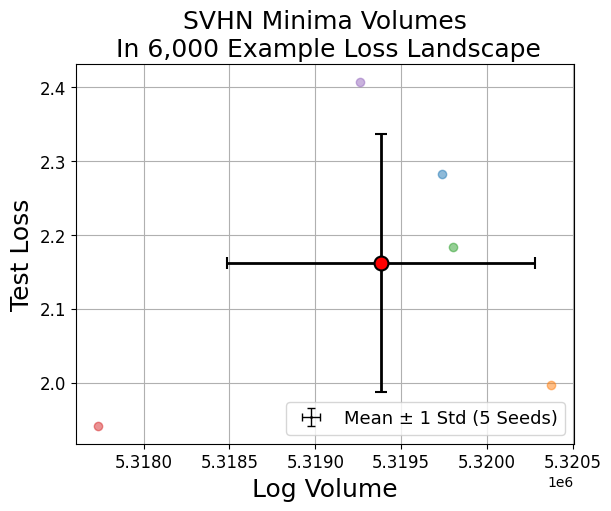

⚠️ Inf detected in y_vals: [5319739.21558455             -inf             -inf]
⚠️ Inf detected in y_vals: [5320376.2589317            -inf            -inf]
⚠️ Inf detected in y_vals: [5319802.14992703             -inf             -inf]
⚠️ Inf detected in y_vals: [5317736.37361524             -inf             -inf]
⚠️ Inf detected in y_vals: [5319258.12937398             -inf             -inf]


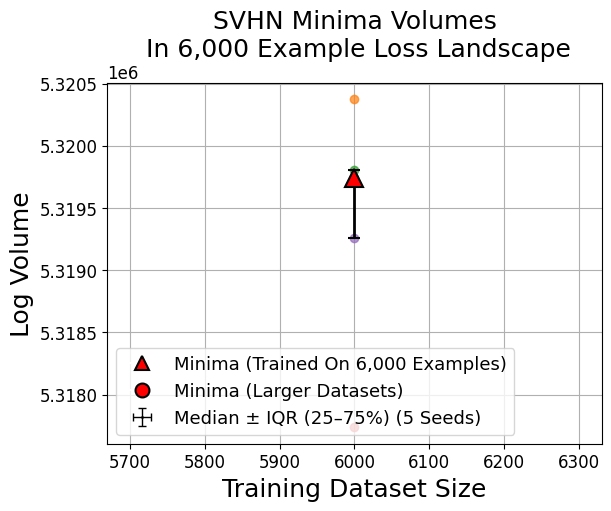

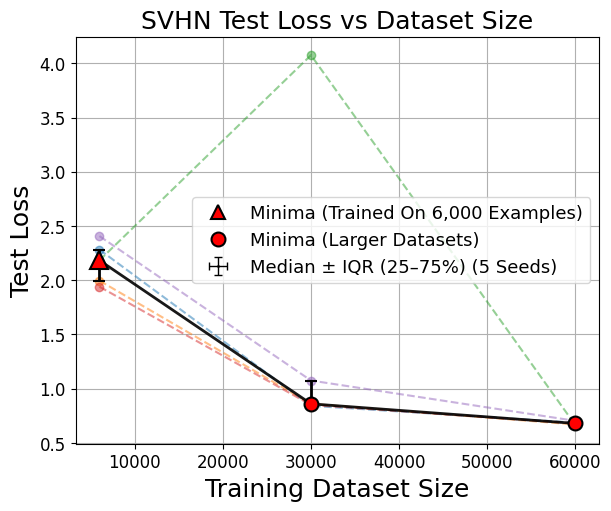

⚠️ Inf detected in x_vals: [5319739.21558455             -inf             -inf]
⚠️ Inf detected in x_vals: [5320376.2589317            -inf            -inf]
⚠️ Inf detected in x_vals: [5319802.14992703             -inf             -inf]
⚠️ Inf detected in x_vals: [5317736.37361524             -inf             -inf]
⚠️ Inf detected in x_vals: [5319258.12937398             -inf             -inf]


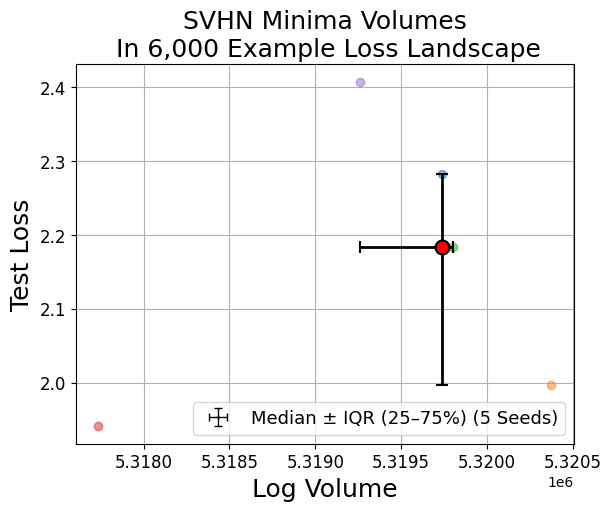

In [3]:
for data_modification in data_modifications:
    print(f"\nProcessing data modification folder: {data_modification}")

    # Create output folder for this data_modification
    save_dir = os.path.join(base_output_dir, data_modification)
    os.makedirs(save_dir, exist_ok=True)

    # Get axis labels and titles
    labels = fixed_landscape_minima_labels(data_modification, base_train_size)

    # Extract minima landscapes
    all_mdl, all_log_rn, all_test_loss = multiple_minima_fixed_landscape(
        experiment_folders, data_modification, loss_value #mdl is modification data level
    )
    number_of_minima = len(all_mdl[0]) # Not used currently

    all_mdl = np.array(all_mdl)
    all_log_rn = np.array(all_log_rn)
    all_test_loss = np.array(all_test_loss)
    
    # Print types and shapes
    #for name, var in [("all_mdl", all_mdl), ("all_log_rn", all_log_rn), ("all_test_loss", all_test_loss)]:
    #    print(f"{name}: type={type(var)}, shape={var.shape}")

    # Save the data using np.savez_compressed
    save_dict = {
        'all_mdl': all_mdl,
        'all_log_rn': all_log_rn,
        'all_test_loss': all_test_loss,
        'data_modification': np.array([data_modification], dtype=object),
        'base_train_size': np.array([base_train_size]),
        'base_shift': np.array([base_shift]),
        'labels': labels
    }
    
    output_path = save_dir
    filename = 'minima_data.npz'
    np.savez_compressed(os.path.join(output_path, filename), **save_dict)
    
    print(f"Saved data to {os.path.join(output_path, filename)}")
    
    # Central tendency runs: mean and median
    for ct, suffix in [("mean", "_avg"), ("median", "_median")]:
        for ranking in [False, True]:
            out_dir = save_dir if not ranking else os.path.join(save_dir, "ranks") #handles ranking
            os.makedirs(out_dir, exist_ok=True)

            # --- Data-level plots: loop through shaded + errorbar ---
            #for avg_style in ["shaded", "errorbar"]:
            #    style_suffix = "_shaded" if avg_style == "shaded" else "_errbar"
            style_suffix = "_errbar"
            avg_style = "errorbar"

            # --- Data level vs Log Volume ---
            plot_fixed_landscape_minima_pair(
                all_mdl, all_log_rn,
                xlabel=labels["xlabel"], ylabel="Log Volume",
                title=f"{problem_name} Minima Volumes\n In {base_train_size + int(data_modification.split("_")[1]):,} Example Loss Landscape",
                #labels["title_volume"],
                log_scale=data_level_log,
                ranking=ranking,
                alpha=0.7,
                output_dir=out_dir,
                filename="data_level_vs_log_volume" + suffix + style_suffix,
                show_plot=not ranking,
                plot_average=True,
                average_style=avg_style,
                central_tendency=ct,
                plot_x_error=(avg_style == "errorbar"),
                xlabel_size=18, ylabel_size=18, title_size=18, legend_size = 13, tick_size = 12,
                base_shift=base_shift,
                background_colors=None,#background_colors,     
                natural_minima_loc = 'first',
                natural_label=f"Minima (Trained On {base_train_size + int(data_modification.split("_")[1]):,} Examples)",
                other_label=other_label,               
                natural_marker="^",            
                other_marker="o",               
            )

            # --- Data level vs Test Loss ---
            plot_fixed_landscape_minima_pair(
                all_mdl, all_test_loss,
                xlabel=labels["xlabel"], ylabel="Test Loss",
                title=f"{problem_name} Test Loss vs Dataset Size",#labels["title_volume"],
                log_scale=False,
                ranking=ranking,
                alpha=0.5,
                output_dir=out_dir,
                filename="data_level_vs_test_loss" + suffix + style_suffix,
                show_plot=not ranking,
                plot_average=True,
                average_style=avg_style,
                central_tendency=ct,
                plot_x_error=(avg_style == "errorbar"),
                xlabel_size=18, ylabel_size=18, title_size=18, legend_size = 13, tick_size = 12,
                base_shift=base_shift,
                background_colors=None,#background_colors,     
                natural_minima_loc = 'first',
                natural_label=f"Minima (Trained On {base_train_size + int(data_modification.split("_")[1]):,} Examples)", 
                other_label=other_label,               
                natural_marker="^",            
                other_marker="o",               
            )

            # --- Log Volume vs Test Loss ---
            # Only error bar version (no shaded version)
            plot_fixed_landscape_minima_pair(
                all_log_rn, all_test_loss,
                xlabel="Log Volume", ylabel="Test Loss",
                title=f"{problem_name} Minima Volumes\n In {base_train_size + int(data_modification.split("_")[1]):,} Example Loss Landscape",
                #labels["title_volume"],
                log_scale=False,
                ranking=ranking,
                alpha=0.5,
                output_dir=out_dir,
                filename="log_volume_vs_test_loss" + suffix + "_errbar",
                show_plot=not ranking,
                plot_average=True,
                average_style="errorbar",
                central_tendency=ct,
                plot_x_error=True,  # allow x-error bars
                xlabel_size=18, ylabel_size=18, title_size=18, legend_size = 13, tick_size = 12,
                background_colors=None,#background_colors,              
                #natural_minima_loc = 'last',
                #natural_label=f"Minima (Trained On {base_train_size + int(data_modification.split("_")[1]):,} Examples)", 
                #other_label=other_label,               
                #natural_marker="^",            
                other_marker="o",               
            )

# Aggregrate Test Accuracy

Test accuracy vs dataset size across all plots.

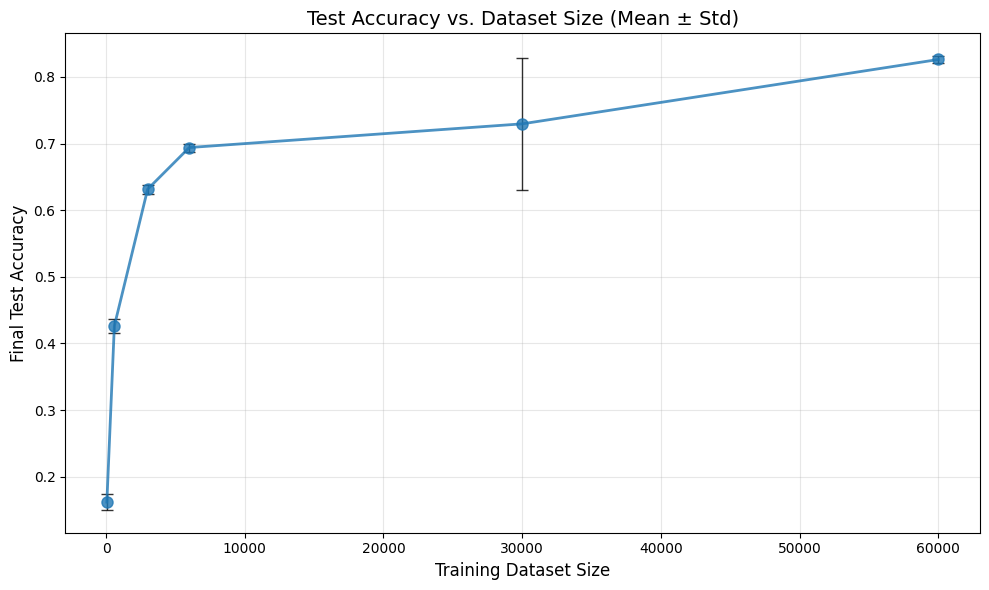

✅ Plot saved to analysis\test_acc_plot.png
🔻 Smallest mean accuracy: 0.1619 ± 0.0119  (dataset size: 60)
🔺 Largest  mean accuracy: 0.8263 ± 0.0052  (dataset size: 60000)
✅ Aggregated data saved to analysis\test_acc.npz


In [4]:
missing_folders = [folder for folder in experiment_folders
                   if not os.path.exists(os.path.join(folder, "test_accuracies.npz"))]

if missing_folders:
    print(f"⚠️ Skipping aggregation — missing test_accuracies.npz in: {missing_folders}")
else:
    # ---------- Step 2: Load all data ----------
    all_dataset_sizes = []
    all_accuracies = []

    for folder in experiment_folders:
        file_path = os.path.join(folder, "test_accuracies.npz")
        data = np.load(file_path)
        all_dataset_sizes.extend(data["dataset_sizes"])
        all_accuracies.extend(data["final_test_accuracies"])

    all_dataset_sizes = np.array(all_dataset_sizes)
    all_accuracies = np.array(all_accuracies)

    # ---------- Step 3: Group by dataset size ----------
    grouped_data = defaultdict(list)
    for size, acc in zip(all_dataset_sizes, all_accuracies):
        grouped_data[size].append(acc)

    sorted_sizes = np.array(sorted(grouped_data.keys()))
    mean_accs = np.array([np.mean(grouped_data[size]) for size in sorted_sizes])
    std_accs = np.array([np.std(grouped_data[size]) for size in sorted_sizes])

    # ---------- Step 4: Plot with error bars ----------
    plt.figure(figsize=(10, 6))
    plt.errorbar(
        sorted_sizes, mean_accs, yerr=std_accs,
        fmt='o-', capsize=4, linewidth=2, markersize=8,
        color='tab:blue', ecolor='black', elinewidth=1, alpha=0.8
    )

    plt.xlabel("Training Dataset Size", fontsize=12)
    plt.ylabel("Final Test Accuracy", fontsize=12)
    plt.title("Test Accuracy vs. Dataset Size (Mean ± Std)", fontsize=14)
    plt.grid(True, alpha=0.3)
    #plt.ylim((0.5, 1.0))
    plt.tight_layout()

    os.makedirs(base_output_dir, exist_ok=True)
    plot_path = os.path.join(base_output_dir, "test_acc_plot.png")
    plt.savefig(plot_path, bbox_inches="tight")
    plt.show()
    plt.close()

    print(f"✅ Plot saved to {plot_path}")

    # Find index of smallest and largest mean accuracy
    min_idx = np.argmin(mean_accs)
    max_idx = np.argmax(mean_accs)
    
    min_mean = mean_accs[min_idx]
    min_std = std_accs[min_idx]
    min_size = sorted_sizes[min_idx]
    
    max_mean = mean_accs[max_idx]
    max_std = std_accs[max_idx]
    max_size = sorted_sizes[max_idx]
    
    print(f"🔻 Smallest mean accuracy: {min_mean:.4f} ± {min_std:.4f}  (dataset size: {min_size})")
    print(f"🔺 Largest  mean accuracy: {max_mean:.4f} ± {max_std:.4f}  (dataset size: {max_size})")

    # ---------- Step 5: Save combined data ----------
    save_path = os.path.join(base_output_dir, "test_acc.npz")
    np.savez(
        save_path,
        dataset_sizes=sorted_sizes,
        mean_accuracies=mean_accs,
        std_accuracies=std_accs,
        all_dataset_sizes=all_dataset_sizes,
        all_accuracies=all_accuracies
    )
    print(f"✅ Aggregated data saved to {save_path}")

# Comparisons Across Loss Landscapes



Here, we track the performance of all models across all loss landscapes.

Collected results for 5 experiments
Collected results for 5 experiments
Collected results for 5 experiments
Collected results for 5 experiments
Collected results for 5 experiments
Collected results for 5 experiments
Model_0: first exceedance at index 60 (value=0.2515120506286621, threshold=0.1)
Appended cutoff for model_0_data_10 | target=0, cutoff_idx=60
Model_0: first exceedance at index 60 (value=0.4239112436771393, threshold=0.1)
Appended cutoff for model_1_data_11 | target=0, cutoff_idx=60
Model_0: first exceedance at index 63 (value=0.2400614321231842, threshold=0.1)
Appended cutoff for model_2_data_12 | target=0, cutoff_idx=63
Model_0: first exceedance at index 60 (value=0.18040154874324799, threshold=0.1)
Appended cutoff for model_3_data_13 | target=0, cutoff_idx=60
Model_0: first exceedance at index 61 (value=0.22739167511463165, threshold=0.1)
Appended cutoff for model_4_data_14 | target=0, cutoff_idx=61
Model_540: first exceedance at index 617 (value=0.12210006266832352, thr

L:\Programming\ARC\minima_volume_project\minima_volume\analysis_funcs.py:909: RuntimeWarning: Mean of empty slice
  center_y = np.nanmean(log_exp_matrix, axis=0)
L:\Programming\diffusion-env\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


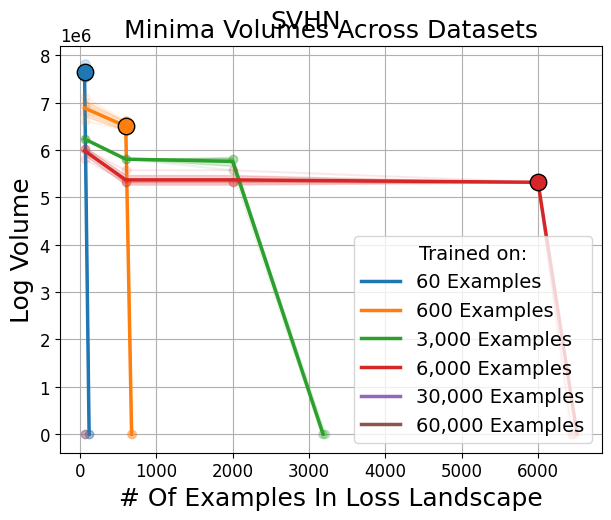

In [5]:
# For the poisoning experiments, this plot has no meaning

labels = varying_landscape_minima_labels(
    data_modification_folder=data_modifications[0], # Random choice to grab datatype from
    base_train_size=base_train_size,
)

results_dict = model_volume_across_targets(
    target_model_data_levels=model_data_sizes,
    loss_value=loss_value,
    experiment_folders=experiment_folders
)
results_with_cutoff = append_cutoff_points(results_dict, threshold=loss_value, base_dir=".")
save_results_dict_npz(results_with_cutoff, "analysis/volumes_across_datasets.npz")

found_minima_vol, found_minima_dataset = plot_minima_volume_vs_data_level(
    results_dict = results_with_cutoff,
    data_type=labels["data_type"],        
    base_train_size=base_train_size, 
    xlabel=labels["xlabel"],
    ylabel="Log Volume",
    suptitle=f"{problem_name}",
    title=f"Minima Volumes Across Datasets",
    log_scale = data_level_log,
    alpha=0.1,
    plot_average=True,
    output_dir=base_output_dir, filename="log_volumes_vs_data_levels",
    xlabel_size=18, ylabel_size=18, title_size=18, suptitle_size=18, legend_size=14, legend_title_fontsize=14,
)

Plotting minima trained with 0 additional data points
[[7686350.49310294       0.        ]
 [7551362.96472166       0.        ]
 [7813059.49302732       0.        ]
 [7685900.59856035       0.        ]
 [7552068.36800819       0.        ]]
The averages are  [7657748.38348409       0.        ]
Plotting minima trained with 540 additional data points
[[6954970.0529474  6431546.66549096       0.        ]
 [6955218.6054334  6613379.12837705       0.        ]
 [6615413.05014365 6430286.686033         0.        ]
 [7113653.41246285 6614683.11321506       0.        ]
 [6788395.07431352 6429525.5955634        0.        ]]
The averages are  [6885530.03906016 6503884.23773589       0.        ]
Plotting minima trained with 2940 additional data points
[[6232652.68672477 5808426.84937861 5808426.84937861       0.        ]
 [6235023.45293251 5807548.90494051 5805820.70209237       0.        ]
 [6233204.55905067 5807888.56632633 5572309.0949763        0.        ]
 [6235096.45529952 5808052.71443136 58

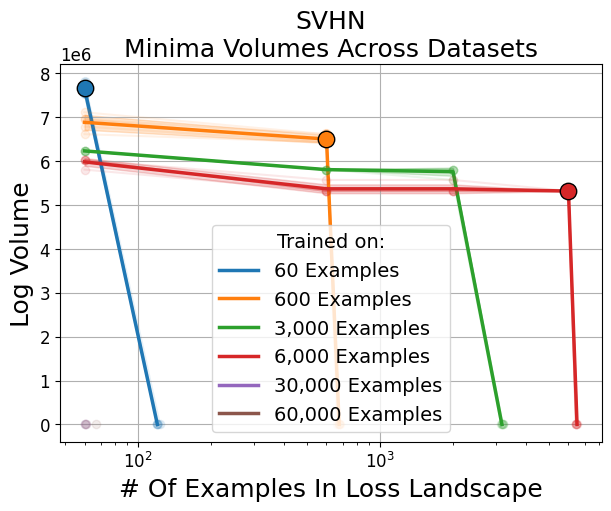

In [6]:
_, _, = plot_minima_volume_vs_data_level(
    results_dict = results_with_cutoff,
    data_type=labels["data_type"],          
    base_train_size=base_train_size, 
    xlabel=labels["xlabel"],
    ylabel="Log Volume",
    #suptitle=f"{problem_name}",
    title=f"{problem_name}\nMinima Volumes Across Datasets",
    log_scale = True,
    alpha=0.1,
    plot_average=True,
    output_dir=base_output_dir, filename="log_volumes_vs_data_levels_log",
    xlabel_size=18, ylabel_size=18, title_size=18, suptitle_size=18, legend_size=14, legend_title_fontsize=14,
)

## Customized Plot

Plotting minima trained with 0 additional data points
[[7686350.49310294       0.        ]
 [7551362.96472166       0.        ]
 [7813059.49302732       0.        ]
 [7685900.59856035       0.        ]
 [7552068.36800819       0.        ]]
The averages are  [7657748.38348409       0.        ]
Plotting minima trained with 540 additional data points
[[6954970.0529474  6431546.66549096       0.        ]
 [6955218.6054334  6613379.12837705       0.        ]
 [6615413.05014365 6430286.686033         0.        ]
 [7113653.41246285 6614683.11321506       0.        ]
 [6788395.07431352 6429525.5955634        0.        ]]
The averages are  [6885530.03906016 6503884.23773589       0.        ]
Plotting minima trained with 2940 additional data points
[[6232652.68672477 5808426.84937861 5808426.84937861       0.        ]
 [6235023.45293251 5807548.90494051 5805820.70209237       0.        ]
 [6233204.55905067 5807888.56632633 5572309.0949763        0.        ]
 [6235096.45529952 5808052.71443136 58

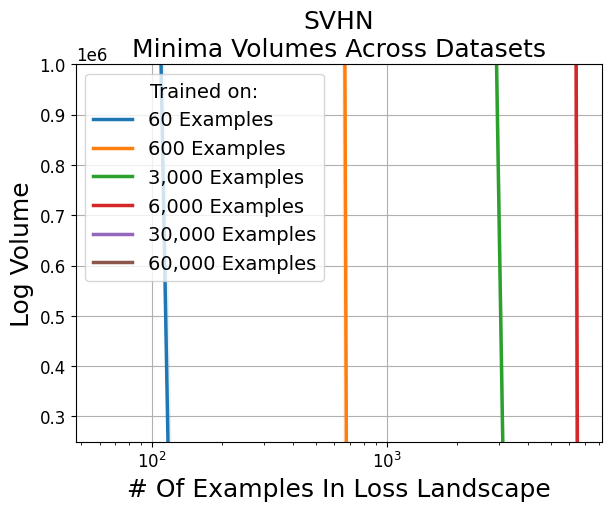

In [7]:
# We experiment a little with making customized graphs.

_, _, = plot_minima_volume_vs_data_level(
    results_dict = results_with_cutoff,
    data_type=labels["data_type"],          
    base_train_size=base_train_size, 
    xlabel=labels["xlabel"],
    ylabel="Log Volume",
    #suptitle=f"{problem_name}",
    title=f"{problem_name}\nMinima Volumes Across Datasets",
    log_scale = True,
    alpha=0.1,
    plot_average=True,
    output_dir=base_output_dir, filename="log_volumes_vs_data_levels_log_custom",
    xlabel_size=18, ylabel_size=18, title_size=18, suptitle_size=18, legend_size=14, legend_title_fontsize=14,
    ylim = (250000, 1000000)
)

Smallest found_minima_vol: 5319382.425487
Largest  found_minima_vol: 7657748.383484
Fitting to y = a * log(x) + log(k) 
Exponent a = -507769.7161
Log k = 9741838.8373
y = -507769.7161 × log(x) + 9741838.8373
The exponent divided by the number of parameters is  -0.29741547994896067


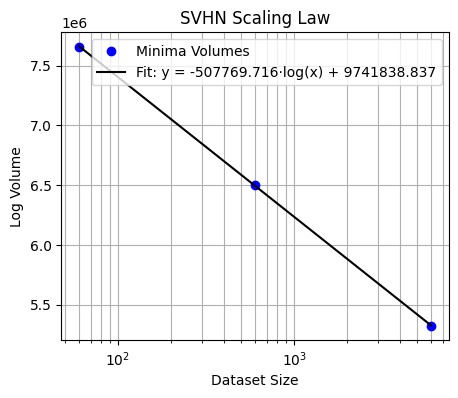

Figure saved to: analysis\scaling.png


In [8]:
# Convert to numpy arrays
x = np.array(found_minima_dataset)
y = np.array(found_minima_vol)

print(f"Smallest found_minima_vol: {y.min():.6f}")
print(f"Largest  found_minima_vol: {y.max():.6f}")

# Fit a linear relationship: y = n * log(x) + log(k)
coefficients = np.polyfit(np.log(x), y, 1)

# Extract the exponent n and constant log(k)
exponent = coefficients[0]  # This is your exponent!
log_k = coefficients[1]  # log of the constant

print(f"Fitting to y = a * log(x) + log(k) ")
print(f"Exponent a = {exponent:.4f}")
print(f"Log k = {log_k:.4f}")
#print(f"Power law relationship: z = {k:.4f} × x^{n:.4f}")
print(f"y = {exponent:.4f} × log(x) + {log_k:.4f}")

print("The exponent divided by the number of parameters is ", exponent/num_params)

# Create the fit line for plotting
x_fit = np.linspace(min(x), max(x), 100)
y_fit = exponent * np.log(x_fit) + log_k

# Plot
plt.figure(figsize=(5, 4))
plt.plot(x, y, 'bo', label="Minima Volumes")
plt.plot(x_fit, y_fit, 'k-', label=f'Fit: y = {exponent:.3f}·log(x) + {log_k:.3f}')
#plt.plot(xs, a*xs + b, '--', label=f"Fit: y = {np.exp(b):.2f} * x^{a:.2f}")
#plt.loglog(xs, fit_line, '--', label=f"Fit: y = {np.exp(b):.2f} * x^{a:.2f}")
plt.xscale("log")
plt.xlabel("Dataset Size")
plt.ylabel("Log Volume")
plt.title(f"{problem_name} Scaling Law")
plt.legend()
plt.grid(True, which="both")
output_path = os.path.join(base_output_dir, "scaling.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()  # Close the figure to free memory

print(f"Figure saved to: {output_path}")